# MNIST Data 'Basic' Approach

Softmax Regression Approach: It returns a list of values between 0 and 1 that add up to 1 (think of it as a list of probabilities).

`act(z)(j) = exp(z(j)) / sum(exp(z(j))) for j= 1, ... k`

We will use softmax as our activation function.



In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
mnist.train.images.shape

(55000, 784)

In [13]:
single = mnist.train.images[1].reshape(28,28)

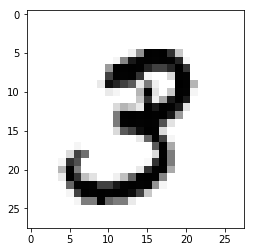

In [16]:
plt.imshow(single, cmap='Greys');

In [17]:
single.min()

0.0

In [18]:
single.max()

1.0

In [28]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])

In [29]:
# Variables
W = tf.Variable(tf.zeros([784, 10])) # initialised as zero, not ideal as we discussed, but very simple
b= tf.Variable(tf.zeros([10]))

In [30]:
# Graph Operations
y = tf.matmul(x, W) + b

In [33]:
# Loss Function
y_true = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [34]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [36]:
# Session and Run
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    steps = 1000
    batch_size = 100
    
    for step in range(steps):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size) #sweet that we have this method, not usual.
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    # Evaluate the Model
    
    #  the value with the most probability in y and y_true for axis=1
    # tf.equal asserts if values are Equal as a list.
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    # convert Trues to 1, Falses to 0, and get the reduce mean of that list
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9209


92% sounds pretty good, right? Compared to other models, such as CNN, it isn't that great